In [1]:
import sys
import numpy as np 
import pandas as pd
import seaborn as sns
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

sns.set_style("whitegrid")

sys.path.append('../code/')
import rf_regression as rfr
import plotly.express as px
from scipy import stats
import combat

In [2]:
#load data 
df = pd.read_excel(fn)
df = df[df["MPRAGE"].isin(["pass", "maybe", "fail"])]
df = df[['age', 'site_id', 'MPRAGE', 'REST1', 'FACES1', 'FACES2', 'REST2', 'T2_SPACE', 'DTI']]
df = df.dropna()
df = df.reset_index()

In [3]:
mprage_status = df['MPRAGE'].values
rest1_status = df['REST1'].values
rest2_status = df['REST2'].values
faces1_status = df['FACES1'].values
faces2_status = df['FACES2'].values
t2_status = df['T2_SPACE'].values
dti_status = df['DTI'].values

mprage_status = rfr.get_binary_passfail(mprage_status)
rest1_status = rfr.get_binary_passfail(rest1_status)
rest2_status = rfr.get_binary_passfail(rest2_status)
faces1_status = rfr.get_binary_passfail(faces1_status)
faces2_status = rfr.get_binary_passfail(faces2_status)
t2_status = rfr.get_binary_passfail(t2_status)
dti_status = rfr.get_binary_passfail(dti_status)

faces_status = 1*((faces1_status + faces2_status) > 0)
y_t1 = mprage_status
y_r1 = rest1_status*mprage_status
y_f = faces_status*rest1_status*mprage_status
y_r2 = rest2_status*faces_status*rest1_status*mprage_status
y_t2 = t2_status*rest2_status*faces_status*rest1_status*mprage_status
y_dti = dti_status*t2_status*rest2_status*faces_status*rest1_status*mprage_status

y_regression = y_t1 + y_r1 + y_f + y_r2 + y_t2 + y_dti

In [4]:
age = df['age'].values

In [5]:
min(age)

5.55753424657534

In [6]:
max(age)

11.9687214611872

In [7]:
hist_pass, bin_edges = np.histogram(age[y_t1==1], bins=(5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5))
hist_fail, bin_edges = np.histogram(age[y_t1==0], bins=(5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5))
hist_pass = hist_pass.astype(np.float64)
hist_fail = hist_fail.astype(np.float64)


for n in range(0, len(hist_pass)): 
    hist_pass[n] = hist_pass[n] / (hist_pass[n]+hist_fail[n])
    hist_fail[n] = 1 - hist_pass[n]



In [8]:
hist_pass

array([0.8       , 0.8974359 , 1.        , 0.95652174, 0.93333333,
       0.9375    , 1.        ])

In [9]:
hist_fail

array([0.2       , 0.1025641 , 0.        , 0.04347826, 0.06666667,
       0.0625    , 0.        ])

In [10]:
hist_fail

array([0.2       , 0.1025641 , 0.        , 0.04347826, 0.06666667,
       0.0625    , 0.        ])

In [11]:
hist_pass = np.array(hist_pass)

In [12]:
hist_pass[0] = hist_pass[0] / (hist_pass[0]+hist_fail[0])
hist_fail[0] = 1 - hist_pass[0]

In [13]:
hist_pass[0] = 0.8

In [14]:
hist_pass

array([0.8       , 0.8974359 , 1.        , 0.95652174, 0.93333333,
       0.9375    , 1.        ])

In [15]:
hist_pass[0] / (hist_pass[0]+hist_fail[0])

0.8

In [16]:
hist_pass

array([0.8       , 0.8974359 , 1.        , 0.95652174, 0.93333333,
       0.9375    , 1.        ])

In [17]:
hist_fail

array([0.2       , 0.1025641 , 0.        , 0.04347826, 0.06666667,
       0.0625    , 0.        ])

<IPython.core.display.Javascript object>


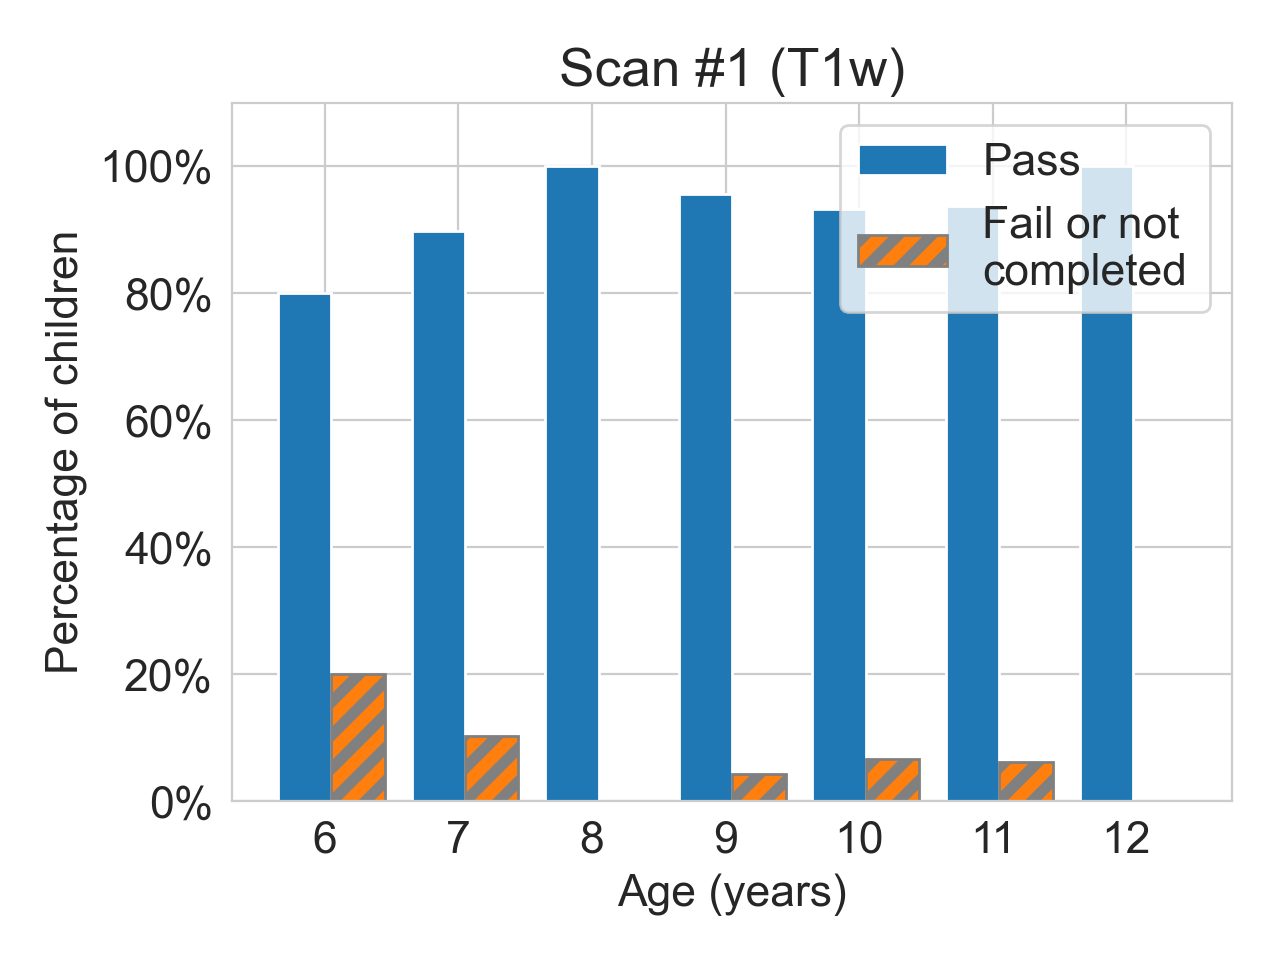

In [21]:
hist_pass, bin_edges = np.histogram(age[y_t1==1], bins=(5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5))
hist_fail, bin_edges = np.histogram(age[y_t1==0], bins=(5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5))
hist_pass = hist_pass.astype(np.float64)
hist_fail = hist_fail.astype(np.float64)


for n in range(0, len(hist_pass)): 
    hist_pass[n] = hist_pass[n] / (hist_pass[n]+hist_fail[n])
    hist_fail[n] = 1 - hist_pass[n]

agex = np.array([6, 7, 8, 9, 10, 11, 12])-0.15

plt.figure()
plt.bar(agex, 100*hist_pass, color='C0', width=0.4)
plt.bar(agex+0.4, 100*hist_fail, hatch='//', edgecolor='gray', color='C1', alpha=1, width=0.4)
plt.rcParams['hatch.linewidth'] = 4.0
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks([6, 7, 8, 9, 10, 11, 12])
plt.ylim(0, 110)
ax.grid(True)

plt.legend(['Pass', 'Fail or not \ncompleted'])
plt.title('Scan #1 (T1w)')
plt.xlabel('Age (years)')
plt.ylabel('Percentage of children')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()



In [22]:
print(sum(age[y_t1==1]>=9)/sum(age>=9))
print(sum(age[y_t1==1]<9)/sum(age<9))

0.9518072289156626
0.923728813559322


In [23]:
print(sum(age[y_r1==1]>=9)/sum(age>=9))
print(sum(age[y_r1==1]<9)/sum(age<9))

0.9156626506024096
0.7796610169491526


In [24]:
print(sum(age[y_f==1]>=9)/sum(age>=9))
print(sum(age[y_f==1]<9)/sum(age<9))

0.8192771084337349
0.4491525423728814


In [25]:
print(sum(age[y_r2==1]>=9)/sum(age>=9))
print(sum(age[y_r2==1]<9)/sum(age<9))

0.6506024096385542
0.3559322033898305


In [26]:
print(sum(age[y_t2==1]>=9)/sum(age>=9))
print(sum(age[y_t2==1]<9)/sum(age<9))

0.5060240963855421
0.17796610169491525


In [27]:
print(sum(age[y_dti==1]>=9)/sum(age>=9))
print(sum(age[y_dti==1]<9)/sum(age<9))

0.20481927710843373
0.025423728813559324


<IPython.core.display.Javascript object>


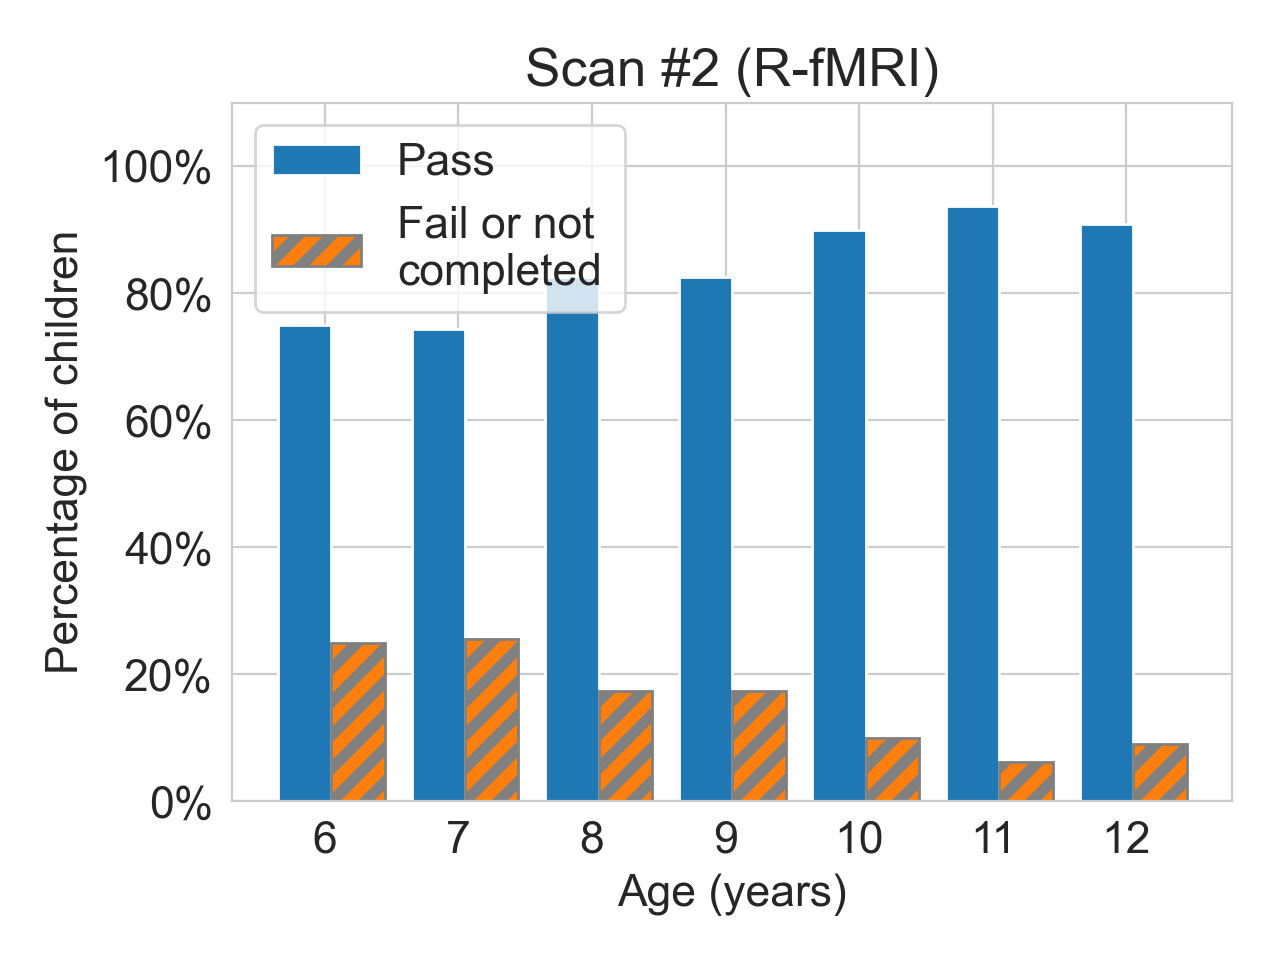

In [28]:
hist_pass, bin_edges = np.histogram(age[y_r1==1], bins=(5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5))
hist_fail, bin_edges = np.histogram(age[y_r1==0], bins=(5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5))
hist_pass = hist_pass.astype(np.float64)
hist_fail = hist_fail.astype(np.float64)

for n in range(0, len(hist_pass)): 
    hist_pass[n] = hist_pass[n] / (hist_pass[n]+hist_fail[n])
    hist_fail[n] = 1 - hist_pass[n]

agex = np.array([6, 7, 8, 9, 10, 11, 12])-0.15




plt.figure()
plt.bar(agex, 100*hist_pass, color='C0', width=0.4)
plt.bar(agex+0.4, 100*hist_fail, hatch='//', edgecolor='gray', color='C1', alpha=1, width=0.4)
plt.rcParams['hatch.linewidth'] = 4.0
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks([6, 7, 8, 9, 10, 11, 12])

plt.ylim(0, 110)
ax.grid(True)


plt.legend(['Pass', 'Fail or not \ncompleted'])
plt.title('Scan #2 (R-fMRI)')
plt.xlabel('Age (years)')
plt.ylabel('Percentage of children')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()



<IPython.core.display.Javascript object>


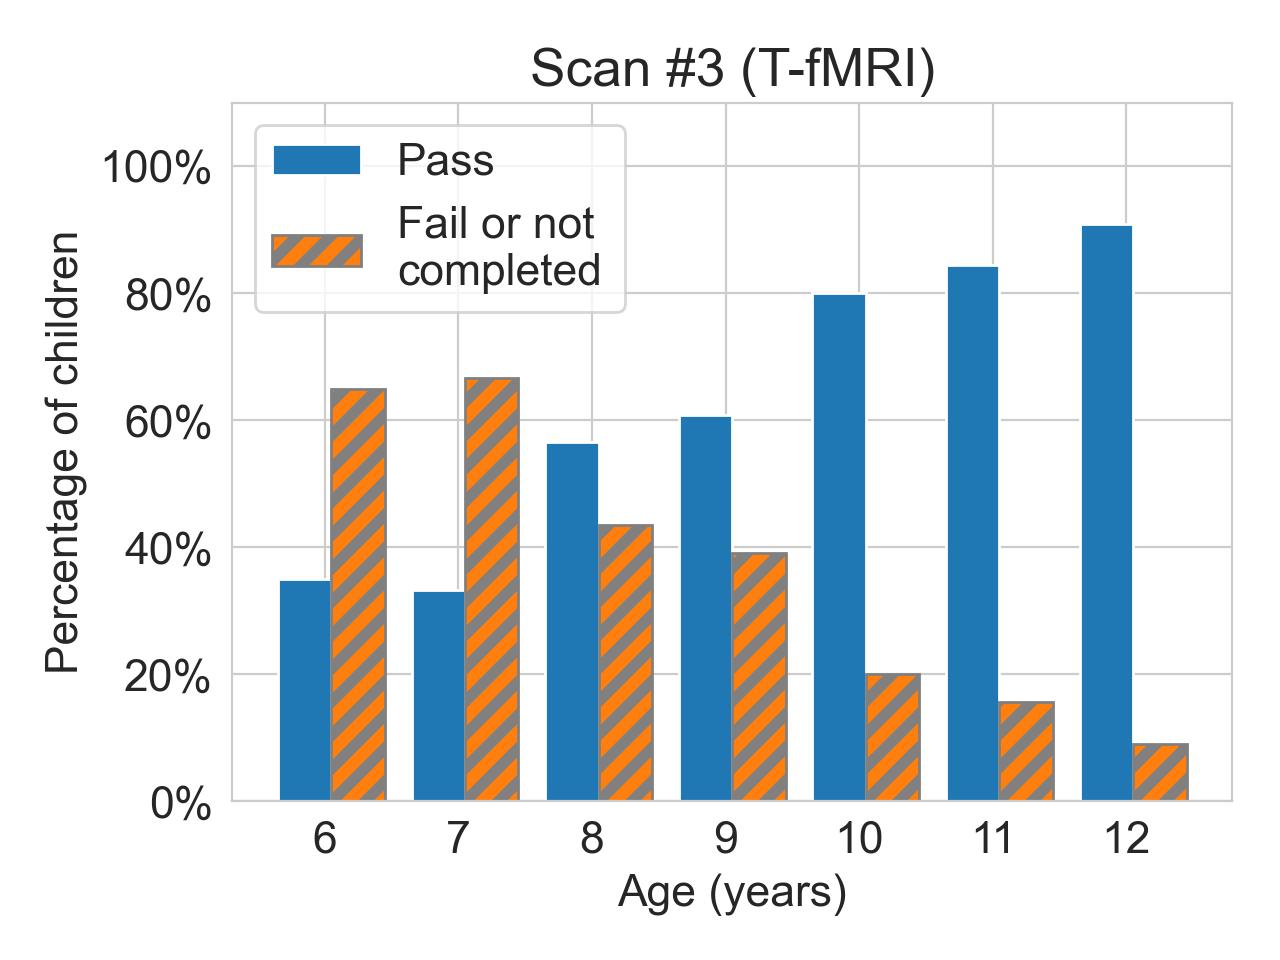

In [33]:
hist_pass, bin_edges = np.histogram(age[y_f==1], bins=(5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5))
hist_fail, bin_edges = np.histogram(age[y_f==0], bins=(5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5))
hist_pass = hist_pass.astype(np.float64)
hist_fail = hist_fail.astype(np.float64)

for n in range(0, len(hist_pass)): 
    hist_pass[n] = hist_pass[n] / (hist_pass[n]+hist_fail[n])
    hist_fail[n] = 1 - hist_pass[n]

agex = np.array([6, 7, 8, 9, 10, 11, 12])-0.15


plt.figure()
plt.bar(agex, 100*hist_pass, color='C0', width=0.4)
plt.bar(agex+0.4, 100*hist_fail, hatch='//', edgecolor='gray', color='C1', alpha=1, width=0.4)
plt.rcParams['hatch.linewidth'] = 4.0
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks([6, 7, 8, 9, 10, 11, 12])

plt.ylim(0, 110)
ax.grid(True)

plt.legend(['Pass', 'Fail or not \ncompleted'])
plt.title('Scan #3 (T-fMRI)')
plt.xlabel('Age (years)')
plt.ylabel('Percentage of children')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()



<IPython.core.display.Javascript object>


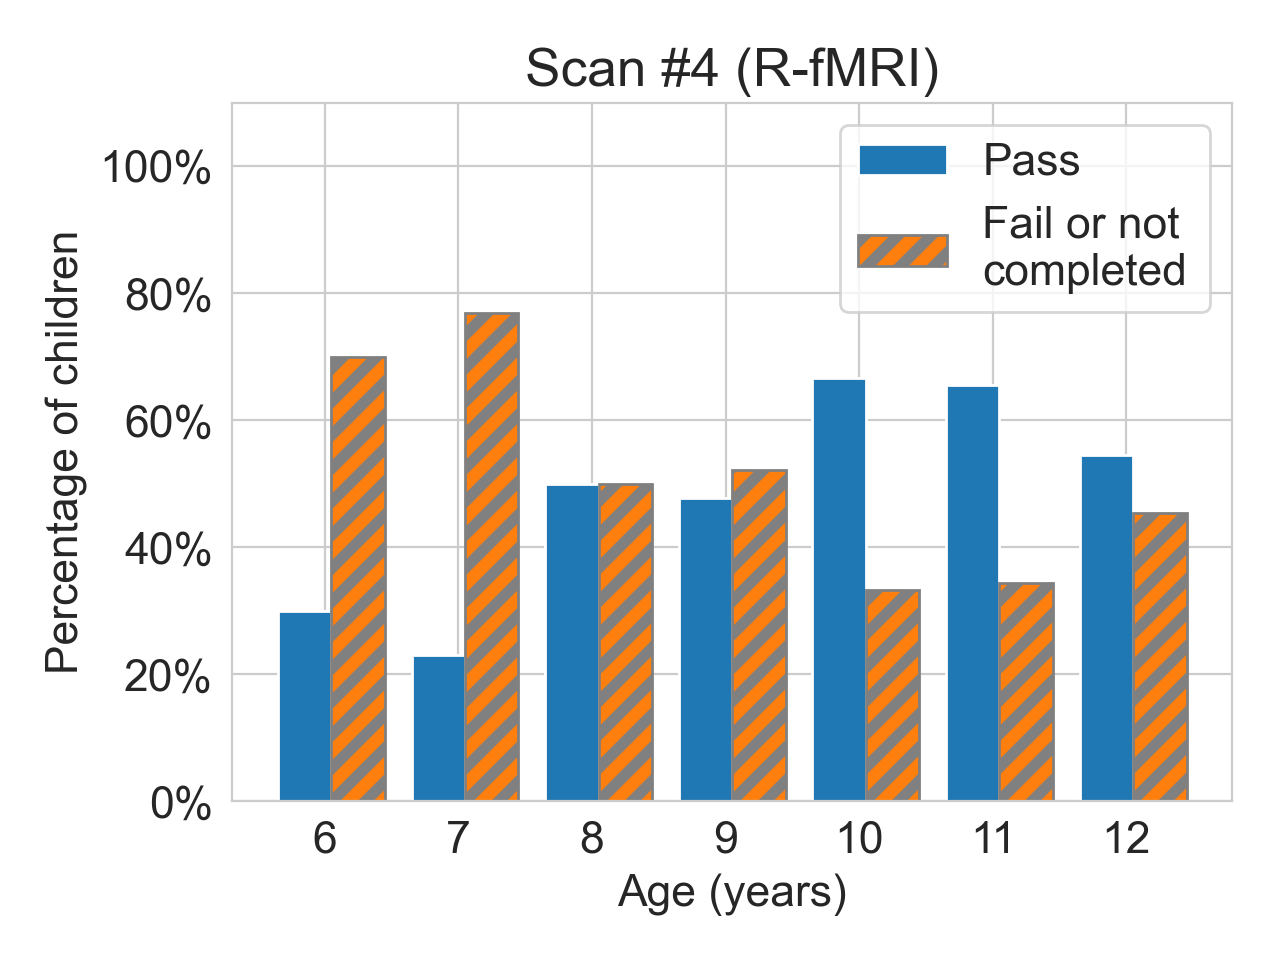

In [34]:
hist_pass, bin_edges = np.histogram(age[y_r2==1], bins=(5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5))
hist_fail, bin_edges = np.histogram(age[y_r2==0], bins=(5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5))
hist_pass = hist_pass.astype(np.float64)
hist_fail = hist_fail.astype(np.float64)

for n in range(0, len(hist_pass)): 
    hist_pass[n] = hist_pass[n] / (hist_pass[n]+hist_fail[n])
    hist_fail[n] = 1 - hist_pass[n]
    
agex = np.array([6, 7, 8, 9, 10, 11, 12])-0.15

plt.figure()
plt.bar(agex, 100*hist_pass, color='C0', width=0.4)
plt.bar(agex+0.4, 100*hist_fail, hatch='//', edgecolor='gray', color='C1', alpha=1, width=0.4)
plt.rcParams['hatch.linewidth'] = 4.0
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks([6, 7, 8, 9, 10, 11, 12])


plt.ylim(0, 110)
ax.grid(True)

plt.legend(['Pass', 'Fail or not \ncompleted'])
plt.title('Scan #4 (R-fMRI)')
plt.xlabel('Age (years)')
plt.ylabel('Percentage of children')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()



<IPython.core.display.Javascript object>


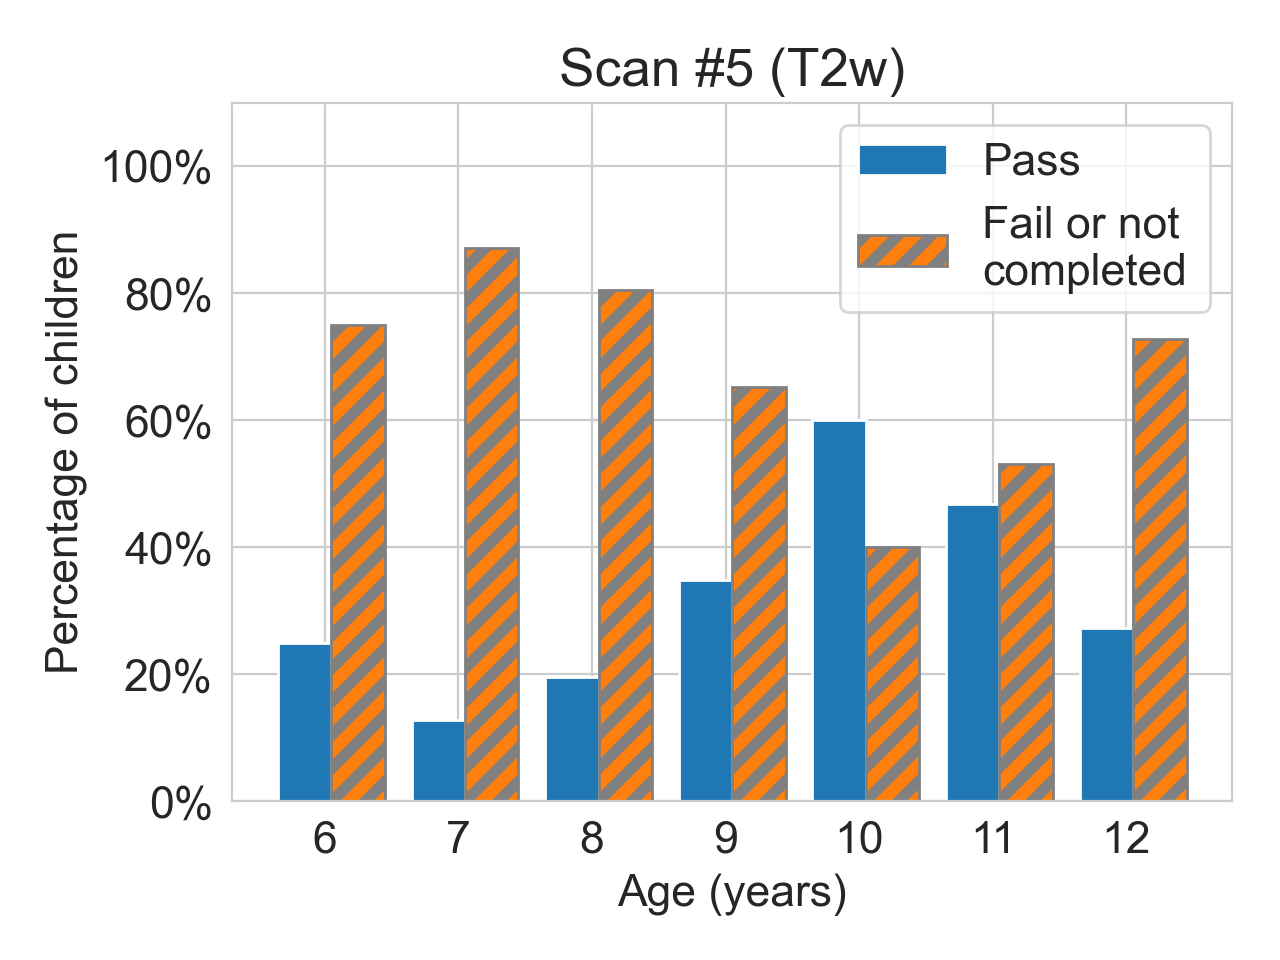

In [35]:
hist_pass, bin_edges = np.histogram(age[y_t2==1], bins=(5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5))
hist_fail, bin_edges = np.histogram(age[y_t2==0], bins=(5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5))
hist_pass = hist_pass.astype(np.float64)
hist_fail = hist_fail.astype(np.float64)

for n in range(0, len(hist_pass)): 
    hist_pass[n] = hist_pass[n] / (hist_pass[n]+hist_fail[n])
    hist_fail[n] = 1 - hist_pass[n]


agex = np.array([6, 7, 8, 9, 10, 11, 12])-0.15


plt.figure()
plt.bar(agex, 100*hist_pass, color='C0', width=0.4)
plt.bar(agex+0.4, 100*hist_fail, hatch='//', edgecolor='gray', color='C1', alpha=1, width=0.4)
plt.rcParams['hatch.linewidth'] = 4.0
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks([6, 7, 8, 9, 10, 11, 12])

plt.ylim(0, 110)
ax.grid(True)


plt.legend(['Pass', 'Fail or not \ncompleted'])
plt.title('Scan #5 (T2w)')
plt.xlabel('Age (years)')
plt.ylabel('Percentage of children')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()



<IPython.core.display.Javascript object>


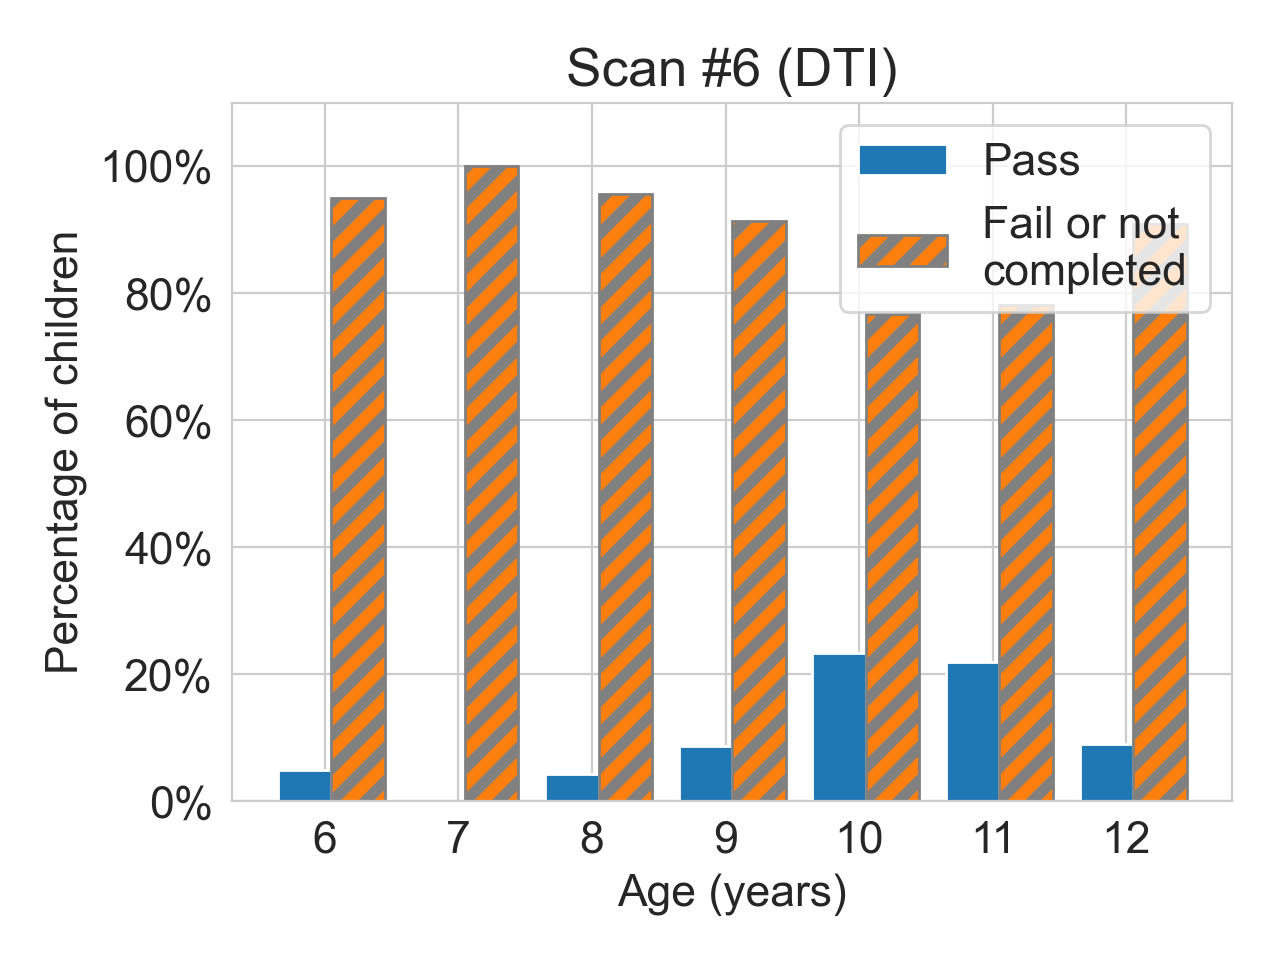

In [36]:
hist_pass, bin_edges = np.histogram(age[y_dti==1], bins=(5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5))
hist_fail, bin_edges = np.histogram(age[y_dti==0], bins=(5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5))
hist_pass = hist_pass.astype(np.float64)
hist_fail = hist_fail.astype(np.float64)

for n in range(0, len(hist_pass)): 
    hist_pass[n] = hist_pass[n] / (hist_pass[n]+hist_fail[n])
    hist_fail[n] = 1 - hist_pass[n]
    
agex = np.array([6, 7, 8, 9, 10, 11, 12])-0.15


plt.figure()
plt.bar(agex, 100*hist_pass, color='C0', width=0.4)
plt.bar(agex+0.4, 100*hist_fail, hatch='//', edgecolor='gray', color='C1', alpha=1, width=0.4)
plt.rcParams['hatch.linewidth'] = 4.0
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks([6, 7, 8, 9, 10, 11, 12])

plt.ylim(0, 110)
ax.grid(True)

plt.legend(['Pass', 'Fail or not \ncompleted'])
plt.title('Scan #6 (DTI)')
plt.xlabel('Age (years)')
plt.ylabel('Percentage of children')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()

